In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene
import statsmodels.stats.weightstats as statsmod
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Q1->Read the file

In [2]:
spend=pd.read_csv("Wholesale+Customers+Data.csv")
spend

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


# Group by Region all the items

In [4]:
df=spend.groupby('Region')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum()
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


# Make dict out of above dataframe and find min and max

In [5]:
dict={'Lisbon':df.loc['Lisbon'].sum(),'Oporto':df.loc['Oporto'].sum(),'Other':df.loc['Other'].sum()}
max_key = max(dict, key=dict.get)
print('Most spending region is: ', max_key)

Most spending region is:  Other


In [6]:
min_key = min(dict, key=dict.get)
print('Least spending region is: ', min_key)

Least spending region is:  Oporto


# Group by Channel all the items

In [7]:
df1=spend.groupby('Channel')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum()
df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


# Make Dict out of above dataframe and find max and min

In [8]:
Dict={'Hotel':df1.loc['Hotel'].sum(),'Retail':df1.loc['Retail'].sum()}
Max_key = max(Dict, key=Dict.get)
print('Most spending Channel is: ', Max_key)

Most spending Channel is:  Hotel


# Use swarmplot to see the distribution across Region and Channel

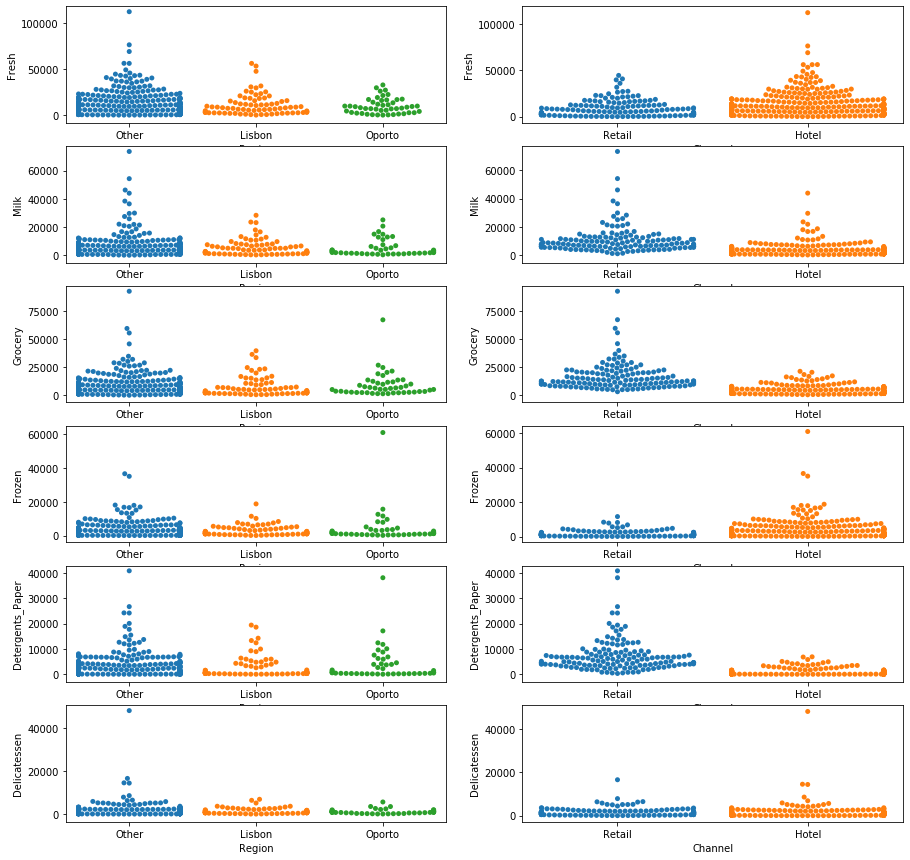

In [9]:
fig_dims = (15, 15)
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=fig_dims)
sns.swarmplot(x='Region', y='Fresh', data=spend, ax=axs[0][0])
sns.swarmplot(x='Channel', y='Fresh', data=spend, ax=axs[0][1])
sns.swarmplot(x='Region', y='Milk', data=spend, ax=axs[1][0])
sns.swarmplot(x='Channel', y='Milk', data=spend, ax=axs[1][1])
sns.swarmplot(x='Region', y='Grocery', data=spend, ax=axs[2][0])
sns.swarmplot(x='Channel', y='Grocery', data=spend, ax=axs[2][1])
sns.swarmplot(x='Region', y='Frozen', data=spend, ax=axs[3][0])
sns.swarmplot(x='Channel', y='Frozen', data=spend, ax=axs[3][1])
sns.swarmplot(x='Region', y='Detergents_Paper', data=spend, ax=axs[4][0])
sns.swarmplot(x='Channel', y='Detergents_Paper', data=spend, ax=axs[4][1])
sns.swarmplot(x='Region', y='Delicatessen', data=spend, ax=axs[5][0])
sns.swarmplot(x='Channel', y='Delicatessen', data=spend, ax=axs[5][1])

# Use Describe to get data stats

In [10]:
spend.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Use Boxplot to display outliers for each items

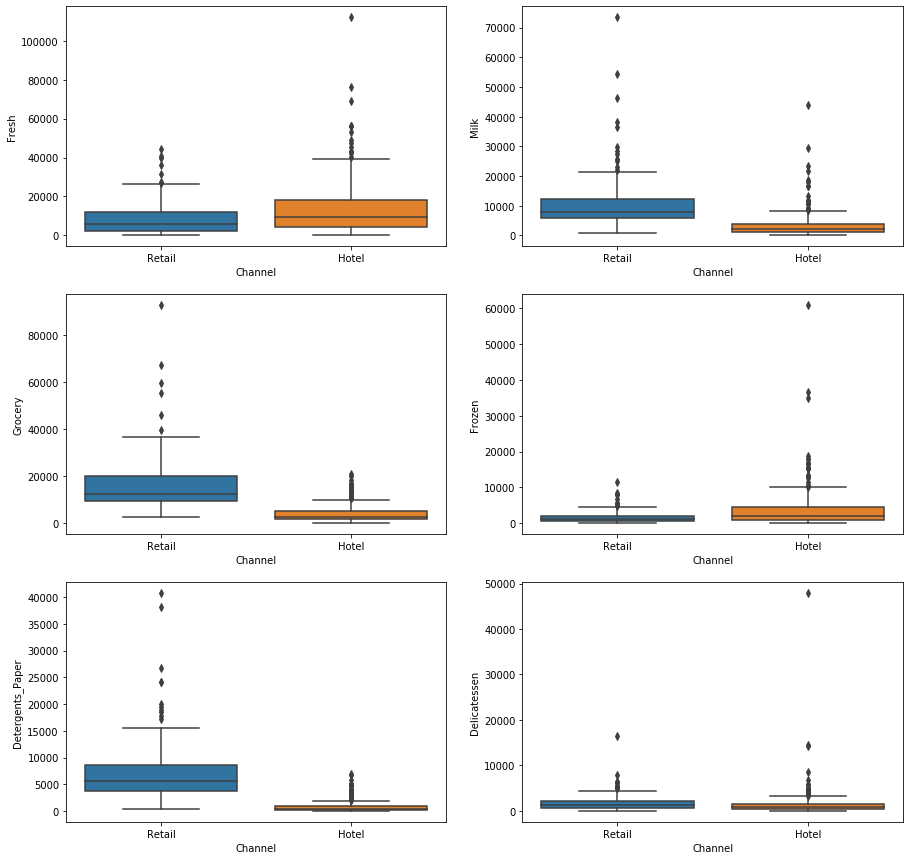

In [11]:
fig_dims = (15, 15)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=fig_dims)
sns.boxplot(y=spend['Fresh'],x=spend['Channel'],ax=axs[0][0])
sns.boxplot(y=spend['Milk'],x=spend['Channel'],ax=axs[0][1])
sns.boxplot(y=spend['Grocery'],x=spend['Channel'],ax=axs[1][0])
sns.boxplot(y=spend['Frozen'],x=spend['Channel'],ax=axs[1][1])
sns.boxplot(y=spend['Detergents_Paper'],x=spend['Channel'],ax=axs[2][0])
sns.boxplot(y=spend['Delicatessen'],x=spend['Channel'],ax=axs[2][1])

# EDA for recommendation

In [12]:
pd.pivot_table(spend,["Buyer/Spender","Milk"],index="Region",columns='Channel',aggfunc={'Milk':'median','Buyer/Spender':'count'})

Buyer/Spender           Milk        
Channel         Hotel Retail   Hotel  Retail
Region                                      
Lisbon             59     18  2280.0  8866.0
Oporto             28     19  1560.5  6817.0
Other             211    105  2247.0  7845.0

In [13]:
pd.pivot_table(spend,['Buyer/Spender','Grocery'],index='Region',columns='Channel',aggfunc={'Grocery':'median','Buyer/Spender':'count'})

Buyer/Spender        Grocery       
Channel         Hotel Retail   Hotel Retail
Region                                     
Lisbon             59     18    2576  16106
Oporto             28     19    3352  12469
Other             211    105    2642  12121

In [14]:
pd.pivot_table(spend,['Buyer/Spender','Frozen'],index='Region',columns='Channel',aggfunc={'Frozen':'median','Buyer/Spender':'count'})

Buyer/Spender         Frozen        
Channel         Hotel Retail   Hotel  Retail
Region                                      
Lisbon             59     18  1859.0  1522.0
Oporto             28     19  2696.5   934.0
Other             211    105  1960.0  1059.0

In [20]:
pd.pivot_table(spend,['Buyer/Spender','Delicatessen'],index='Region',columns='Channel',aggfunc={'Delicatessen':'median','Buyer/Spender':'count'})

Buyer/Spender        Delicatessen       
Channel         Hotel Retail        Hotel Retail
Region                                          
Lisbon             59     18          749   1414
Oporto             28     19          883   1037
Other             211    105          823   1386

In [15]:
pd.pivot_table(spend,['Buyer/Spender','Detergents_Paper'],index='Region',columns='Channel',aggfunc={'Detergents_Paper':'median','Buyer/Spender':'count'})

Buyer/Spender        Detergents_Paper       
Channel         Hotel Retail            Hotel Retail
Region                                              
Lisbon             59     18              412   6177
Oporto             28     19              325   6236
Other             211    105              375   5121

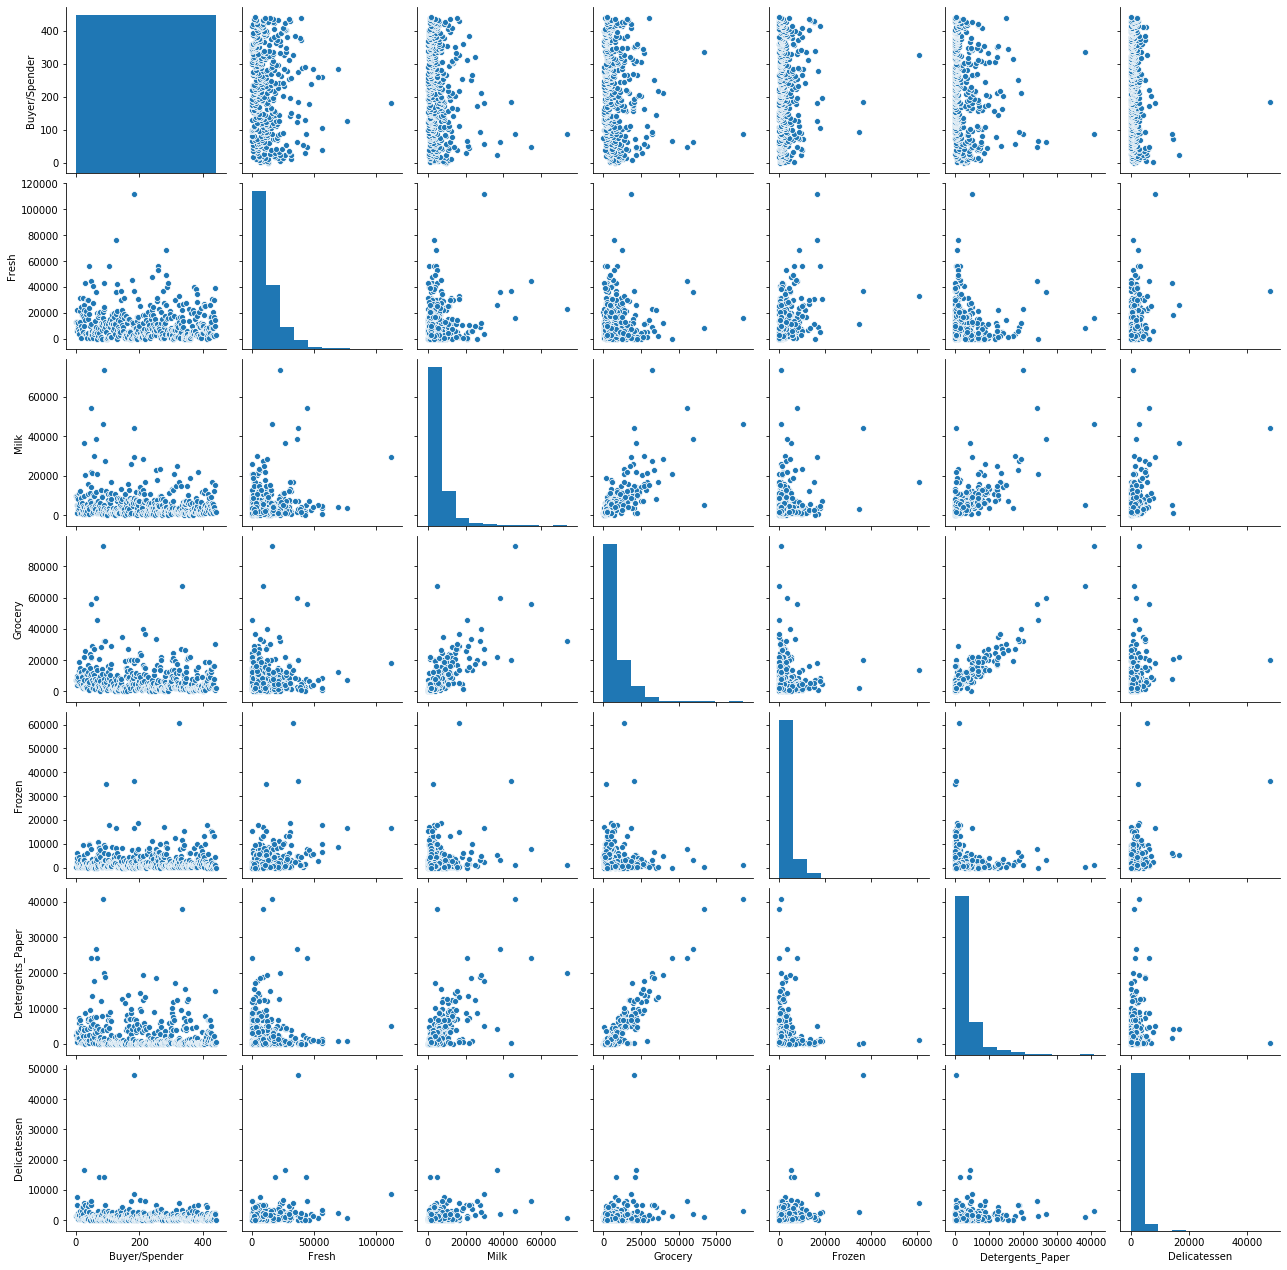

In [16]:
sns.pairplot(spend)

In [17]:
cor=spend.corr()
cor

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


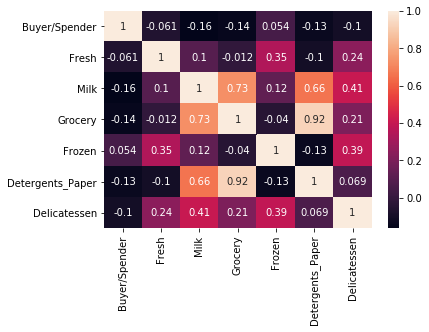

In [19]:
sns.heatmap(cor,annot=True)

# Q2->Read the file

In [4]:
survey=pd.read_csv("Survey.csv")
survey

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


# Use crosstab for Q 2.1.1 to 2.1.4

In [3]:
pd.crosstab(survey['Gender'],survey['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [4]:
pd.crosstab(survey['Gender'],survey['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [5]:
pd.crosstab(survey['Gender'],survey['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [6]:
pd.crosstab(survey['Gender'],survey['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# Q2.4 Normal dist check for all 3 variables

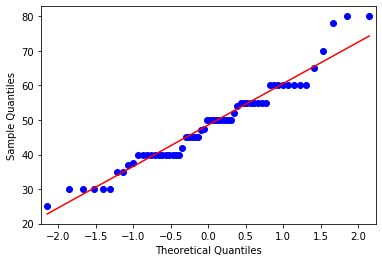

(0.9565856456756592, 0.028000956401228905)

In [9]:
qqplot(survey['Salary'], line='s')
pyplot.show()
shapiro(survey['Salary'])

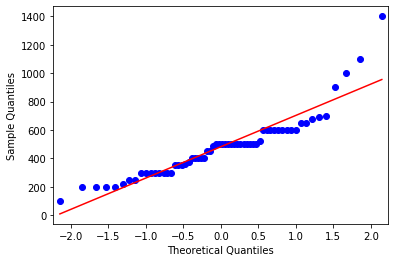

(0.8777452111244202, 1.6854661225806922e-05)

In [10]:
qqplot(survey['Spending'], line='s')
pyplot.show()
shapiro((survey['Spending']))

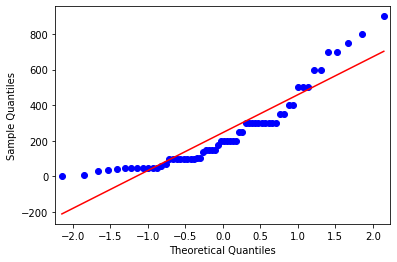

(0.8594191074371338, 4.324040673964191e-06)

In [11]:
qqplot(survey['Text Messages'], line='s')
pyplot.show()
shapiro(survey['Text Messages'])

# Q3-> Read csv file

In [2]:
shingles=pd.read_csv("A+&+B+shingles.csv")
shingles

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [9]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

# Make arrays out of the df columns

In [8]:
A=np.array(shingles['A'])
B=np.array(shingles[~shingles['B'].isnull()]['B'])

# Normality test

In [14]:
print(shapiro(A))
print(shapiro(B))

(0.9375598430633545, 0.042670514434576035)
(0.9172994494438171, 0.02002784051001072)


# Equality of variance test

In [19]:
levene(A,B)

LeveneResult(statistic=0.23808965111555147, pvalue=0.6272312061867605)

# Independent t-test

In [10]:
tstat, pvalue, df = statsmod.ttest_ind(A, B, usevar='pooled', alternative='two-sided')

In [11]:
print("t Stat  : ", tstat)
print("p Value : ", pvalue)

t Stat  :  1.2896282719661123
p Value :  0.20174965718353277
